In [1]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
FitFunctionsPath = env('FitFunctionsPath') #* get the path of the script
root_Data_Input  = env('DataSet_Img_Vs_Img_InPut')         #* get the path of the dataSet
root_Data_Output = env('DataSet_Img_Vs_Img_OutPut')         #* get the path of the dataSet
root_Data_Input_Val  = env('DataSet_Img_Vs_Img_InPut_Val')         #* get the path of the dataSet
root_Data_Output_Val = env('DataSet_Img_Vs_Img_OutPut_Val')         #* get the path of the dataSet
root_Data = [root_Data_Input, root_Data_Output]
model_save_dir   = env('model_save_dir')   #* get the path where we will save the model


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
image_Height   = 256
image_Width    = 256
image_Channels = 3
batch_size     = 128

Size data set lower definition 1271


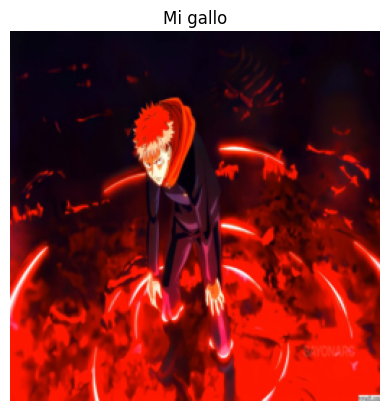

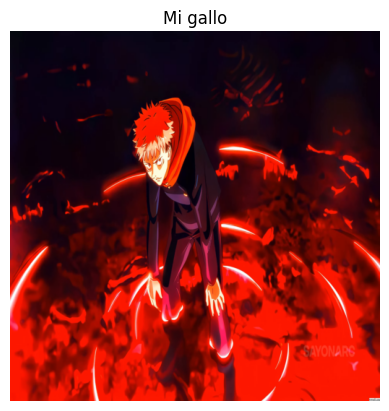

In [3]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


inputResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height, image_Width)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])

outPutResize = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height*2, image_Width*2)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])


myDataSet     = DataSet_Img_To_Img(root_Data, transfor_In_img = inputResize, transfor_Out_img = outPutResize, test = False, dataSize = 1)

# print("myDataSet     = ", myDataSet)
my_Data_Loader      = DataLoader(myDataSet,  batch_size = batch_size, num_workers = 0,  shuffle = True) # sampler = random_sampler = RandomSampler(myDataSet) 

from toolsTest import plot_img_tensor

plot_img_tensor(myDataSet.__getitem__(1)[0])
plot_img_tensor(myDataSet.__getitem__(1)[1])


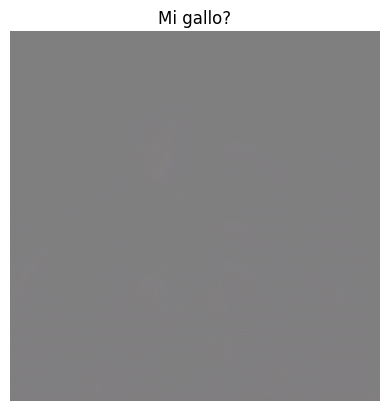

In [4]:
import importlib
import Models.models_SuperResolution

importlib.reload(Models.models_SuperResolution)
from Models.models_SuperResolution import modelSuperResolution

myModel = modelSuperResolution(2)
myModel.to(device = device)
plot_img_tensor(myModel(myDataSet.__getitem__(1)[0]), "Mi gallo?")


In [5]:

import FitFunctions.fitFunctions_superResolution

importlib.reload(Models.models_SuperResolution)
from FitFunctions.fitFunctions_superResolution import train_modelSuperResolution
import torch.nn as nn
from torch import optim
import torch.nn.functional as F


opt_model = optim.Adam(myModel.parameters(), lr = 0.001)

history = train_modelSuperResolution(my_Data_Loader, 
                        myModel, 
                        opt_model, 
                        device      = device, 
                        num_epochs  = 10*2, 
                        get_History = True, 
                        # criterion   = criterion, 
                        getValLoos  = False, 
                        # data_loader_Val = my_Data_Loader_Val,
                        model_save_dir  = model_save_dir)
# print(myModel.state_dict().keys())
# weights = myModel.state_dict()['dens_1.4.weight']



  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/20 process: 90: 100%|██████████| 10/10 [06:26<00:00, 38.64s/it, modelLoss=0.128]


Epoch completed, Average Loss: 0.1409


Epoch 2/20 process: 90: 100%|██████████| 10/10 [06:26<00:00, 38.70s/it, modelLoss=0.118]


Epoch completed, Average Loss: 0.1232


Epoch 3/20 process: 90: 100%|██████████| 10/10 [06:18<00:00, 37.84s/it, modelLoss=0.132]


Epoch completed, Average Loss: 0.1227


Epoch 4/20 process: 90: 100%|██████████| 10/10 [06:08<00:00, 36.87s/it, modelLoss=0.121]


Epoch completed, Average Loss: 0.1219


Epoch 5/20 process: 90: 100%|██████████| 10/10 [06:06<00:00, 36.65s/it, modelLoss=0.123]


Epoch completed, Average Loss: 0.1217


Epoch 6/20 process: 90: 100%|██████████| 10/10 [06:14<00:00, 37.49s/it, modelLoss=0.122]


Epoch completed, Average Loss: 0.1212


Epoch 7/20 process: 90: 100%|██████████| 10/10 [06:31<00:00, 39.17s/it, modelLoss=0.116]


Epoch completed, Average Loss: 0.1209


Epoch 8/20 process: 90: 100%|██████████| 10/10 [06:00<00:00, 36.06s/it, modelLoss=0.115]


Epoch completed, Average Loss: 0.1204


Epoch 9/20 process: 90: 100%|██████████| 10/10 [05:51<00:00, 35.14s/it, modelLoss=0.123]


Epoch completed, Average Loss: 0.1199


Epoch 10/20 process: 90: 100%|██████████| 10/10 [05:52<00:00, 35.25s/it, modelLoss=0.118]


Epoch completed, Average Loss: 0.1197


Epoch 11/20 process: 90: 100%|██████████| 10/10 [05:51<00:00, 35.15s/it, modelLoss=0.129]


Epoch completed, Average Loss: 0.1204


Epoch 12/20 process: 90: 100%|██████████| 10/10 [05:58<00:00, 35.83s/it, modelLoss=0.12]


Epoch completed, Average Loss: 0.1195


Epoch 13/20 process: 90: 100%|██████████| 10/10 [06:07<00:00, 36.79s/it, modelLoss=0.118]


Epoch completed, Average Loss: 0.1195


Epoch 14/20 process: 90: 100%|██████████| 10/10 [06:07<00:00, 36.76s/it, modelLoss=0.117]


Epoch completed, Average Loss: 0.1188


Epoch 15/20 process: 90: 100%|██████████| 10/10 [06:08<00:00, 36.85s/it, modelLoss=0.118]


Epoch completed, Average Loss: 0.1189


Epoch 16/20 process: 50:  60%|██████    | 6/10 [03:41<02:27, 36.83s/it, modelLoss=0.114]

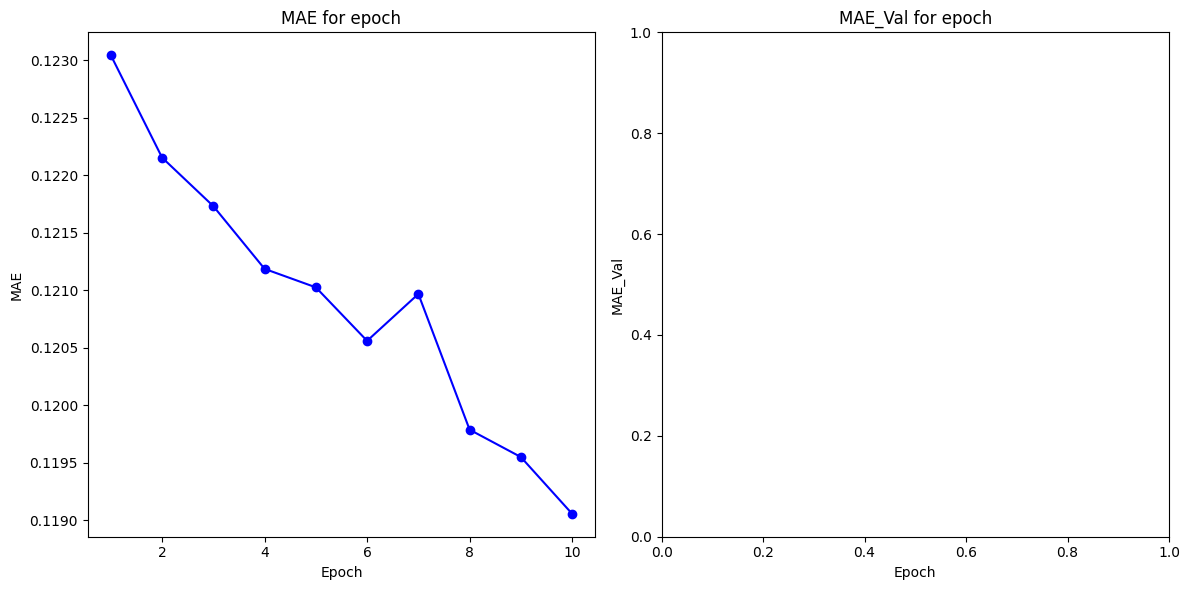

In [13]:
import matplotlib.pyplot as plt

Epochs_values     = range(1, len(history['MAE']) + 1)
# Epochs_values_Val = range(1, len(history['MAE_Val']) + 1)

# Create two subplots (one for MAE and one for MAE_Val) in a single row
fig, (plt1, plt2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot MAE in the first subplot
plt1.plot(Epochs_values, history['MAE'], marker='o', color='blue')
plt1.set_xlabel('Epoch')
plt1.set_ylabel('MAE')
plt1.set_title('MAE for epoch')

# Plot MAE_Val in the second subplot
# plt2.plot(Epochs_values_Val, history['MAE_Val'], marker='o', color='red')
plt2.set_xlabel('Epoch')
plt2.set_ylabel('MAE_Val')
plt2.set_title('MAE_Val for epoch')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


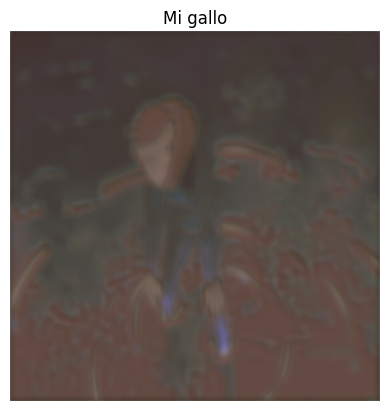

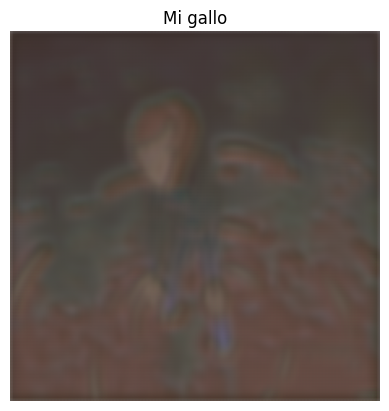

In [19]:
plot_img_tensor(myModel(myDataSet.__getitem__(1)[1]))
plot_img_tensor(myModel(myDataSet.__getitem__(1)[0]))
